## Part 1

Download the ``names.zip`` file and unzip onto your computer. When you unzip the file, you should have a directory called ``names`` with one ``.txt`` file for each year from 1880 - 2019.  Run the following code to put all the files together into one dataset.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import re

In [4]:
# this gets the list of files in the "names" directory and makes a list of only .txt files
directory = 'C:/Users/mporr/OneDrive/Desktop/exam1-AveryPorritt/names/'
# update this path as needed

files = os.listdir(directory)
file_list = [f for f in files if f[-3:] == 'txt']

In [34]:
df = pd.DataFrame()
for f in file_list:
    file_name = directory + f
    dat = pd.read_csv(file_name, header=None)
    dat['year'] = int(re.findall('\d+', f)[0])
    df = pd.concat([df, dat])
df.columns = ['name','gender','n','year']
df = df.sort_values(by=['year','gender','n'], ascending=[1,1,0])

In [6]:
df.head()

,name,gender,n,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
df.tail()

,name,gender,n,year
31949,Zyheem,M,5,2019
31950,Zykel,M,5,2019
31951,Zyking,M,5,2019
31952,Zyn,M,5,2019
31953,Zyran,M,5,2019


In [23]:
# save the completed dataset if you want:
df.to_csv('names.csv', index=False)

In [8]:
# url for problem 1
url1 = 'https://www.ssa.gov/oact/babynames/numberUSbirths.html'

In [40]:
#Problem 1
#Join tables into a temp df, then use np.where to calculate the values to insert
#into the original df

num_births = pd.read_html(url1)[0]
num_births.columns = ['year', 'm', 'f', 'total']
num_births.head()
df_temp = df.merge(num_births, left_on='year', right_on='year')
df['prop'] = np.where('gender' == 'M', df_temp['n']/df_temp['m'], df_temp['n']/df_temp['f'])

df.head()
df.tail()

,year,m,f,total
0,1880,118399,97606,216005
1,1881,108282,98855,207137
2,1882,122031,115695,237726
3,1883,112475,120059,232534
4,1884,122738,137585,260323


In [70]:
#Problem 2

def plotName(name = "", var = "prop"):
    if(name == ""):
        print("You must enter a valid name.")
        return
    elif(name not in df['name'].tolist()):
        print("Name not found in database.")
        return
    if(var not in ["n", "prop"]):
        print("Must use valid graphing designation, ""n"" or ""prop""")
    names = df.loc[df['name'] == name]
    male_names = names.loc[names['gender'] == 'M']
    female_names = names.loc[names['gender'] == 'F']
    earliest_year = min(names['year'])
    latest_year = max(names['year'])
    years_used = len(pd.unique(names['year']))
    if(var == "prop"):
        plt.plot(male_names['year'], male_names['n'], color='Blue', label='M')
        plt.plot(female_names['year'], female_names['n'], color='Red', label='F')
        plt.ylabel('Frequency')
    else:
        plt.plot(male_names['year'], male_names['prop'], color='Blue', label='M')
        plt.plot(female_names['year'], female_names['prop'], color='Red', label='F')
        plt.ylabel('Proportion')
    plt.title(name + " (" + str(earliest_year) + "-" + str(latest_year) + ") (Used in " + str(years_used) + " years)")
    plt.xlabel('Year')
    plt.legend()
    plt.show()

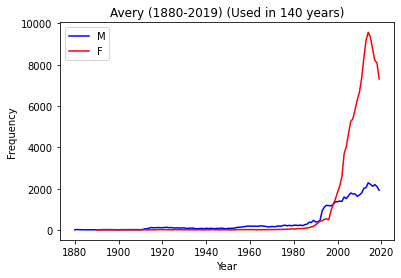

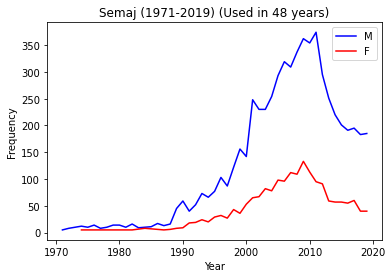

In [96]:
#Problem 3

plotName("Avery")
plotName("Semaj")

In [95]:
#Problem 4

#A - 99444
len(pd.unique(df['name']))

#B - 2008 with 32,524 unique names
unique_years = pd.unique(df['year'])
unique_names = np.NaN * len(unique_years)
uniques = pd.DataFrame(data={'year': unique_years, 'num_names': unique_names})
uniques.loc[uniques['year'] == 1881, 'num_names'] = 55
for year in uniques['year']:
    num_names = len(pd.unique(df.where(df['year'] == year)['name']))
    uniques.loc[uniques['year'] == year, 'num_names'] = num_names

uniques.loc[uniques['num_names'] == max(uniques['num_names'])]

#C - 1881 with 1,831 unique names 
uniques.loc[uniques['num_names'] == min(uniques['num_names'])]

#D - 
unique_names = pd.unique(df['name'])
name_pop = np.NaN * len(unique_names)
name_pops = pd.DataFrame(data={'name': unique_names, 'pop': name_pop})
for name in unique_names:
    pop = np.average(df.loc[df['name'] == name]['prop'])
    name_pops.loc[unique_names['name'] == name, 'pop'] = pop

name_pops.loc[name_pops['frequency'] == max(name_pops[frequency])]

,year,num_names
0,1880,1890.0
1,1881,1831.0
2,1882,2013.0
3,1883,1963.0
4,1884,2159.0


In [ ]:
unique_names = pd.unique(df['name'])
name_pop = np.NaN * len(unique_names)
name_pops = pd.DataFrame(data={'year': unique_names, 'pop': name_pop})
for name in unique_names:
    pop = np.average(df.loc[df['name'] == name]['prop'])
    name_pops.loc[unique_names['name'] == name, 'pop'] = pop

name_pops.loc[name_pops['frequency'] == max(name_pops[frequency])]

## Part 2

In [ ]:
# urls for part 2 
url2a = 'https://en.wikipedia.org/wiki/List_of_earthquakes_2001%E2%80%932010'
url2b = 'https://en.wikipedia.org/wiki/List_of_earthquakes_2011%E2%80%932020'